# Wykrywanie anomalii sieciowy

## 2 Modele

- Rozkłady i anomalie
- Regresja
- Klasyfikacja

## Plan

- Wprowadzenie 15 min
- Rozkłady 20 min
- Resja 20 min
- Klasyfikacja 25 min
- Podsumowanie 10 min



In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import jax
import jax.numpy as jnp
import functools as ft

# Rozkłady i anomalie

- anomalia «odchylenie od normy»
- Co jest normą ? Odpowiada rachunek prawdopodobieństwa.

## Zadanie

Wylosować 10000 liczb z rozkładu normalnego $N(0,1)$. Ile spełnia warunek:

- $x-\mu<0\sigma$
- $x-\mu>1\sigma$
- $x-\mu<-2\sigma$
- $x-\mu>5\sigma$
- $|x-\mu|>5\sigma$

__Co nam mówi obserwacja liczby -8 ?__

## Zadanie

Jak powtórzyć wyniki dla rozkładu wykładniczego

In [2]:
#TODO
# Task 1
mu = 0
sigma = 1
x = np.random.normal(size=10000)
print(((x-mu)<0).sum()) #1
print(((x-mu)>sigma).sum()) #2
print(((x-mu)<-2*sigma).sum()) #3
print(((x-mu)>5*sigma).sum()) #4
print((np.abs((x-mu))>5*sigma).sum()) #5
# Task 2
print('Task 2')
mu = 1
sigma = 1
x = np.random.exponential(size=10000)
print(((x-mu)<0).sum()) #1
print(((x-mu)>sigma).sum()) #2
print(((x-mu)<-2*sigma).sum()) #3
print(((x-mu)>5*sigma).sum()) #4
print((np.abs((x-mu))>5*sigma).sum()) #5

5066
1495
220
0
0
Task 2
6405
1339
0
31
31


## Zadanie:

### twierdzenie graniczne

Narysować rozkład sumy 30 zmiennych losowych o rozkładzie wykładniczym

(array([1.36377e+05, 7.40710e+04, 4.06270e+04, 2.19010e+04, 1.22330e+04,
        6.72400e+03, 3.57500e+03, 2.04700e+03, 1.12500e+03, 5.98000e+02,
        3.29000e+02, 1.86000e+02, 9.00000e+01, 5.00000e+01, 3.20000e+01,
        1.10000e+01, 1.20000e+01, 6.00000e+00, 4.00000e+00, 2.00000e+00]),
 array([3.38096268e-06, 6.03150103e-01, 1.20629682e+00, 1.80944355e+00,
        2.41259027e+00, 3.01573699e+00, 3.61888371e+00, 4.22203043e+00,
        4.82517715e+00, 5.42832388e+00, 6.03147060e+00, 6.63461732e+00,
        7.23776404e+00, 7.84091076e+00, 8.44405748e+00, 9.04720421e+00,
        9.65035093e+00, 1.02534976e+01, 1.08566444e+01, 1.14597911e+01,
        1.20629378e+01]),
 <BarContainer object of 20 artists>)

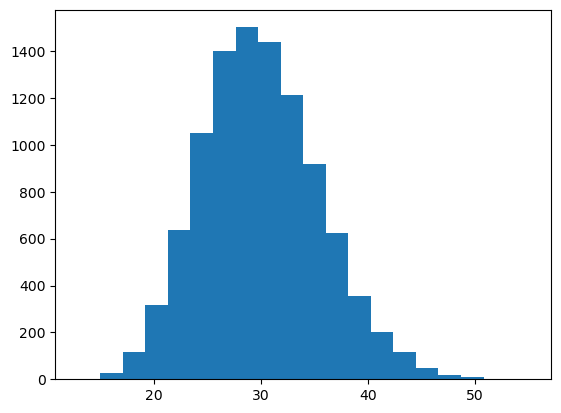

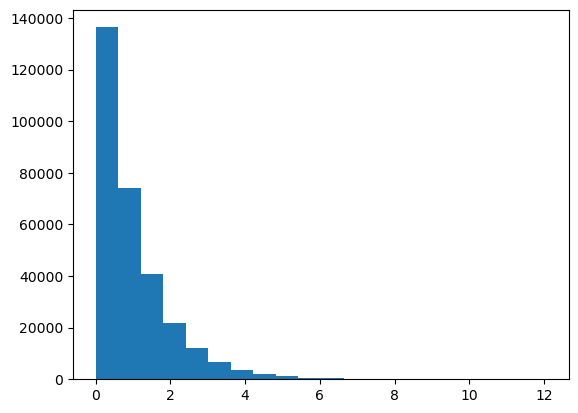

In [3]:
#TODO
x = np.random.exponential(size=(30, 10000))
y = np.sum(x, axis=0)
plt.hist(y, 20)
plt.figure()
plt.hist(x.flatten(), 20)

# Modele

1. Hipoteza $\hat y = f(x,\theta) + \varepsilon$, $\varepsilon$ to błąd i zakładamy że pochodzi z pewnego rozkładu
2. Trening $\theta = \arg\min \frac{1}{N}\sum\ell(y,\hat y)$

# Model liniowy

$f(x,\theta)=w_0 + w_1x_1 + w_2 x_2 + \ldots$, $\theta=(w_0,w_1,w_2,\ldots)$

$\ell(y,\hat y)=(y-\hat y)^2$ - regresja

### Diamenty

In [4]:
diamonds = pd.read_csv('../data/diamonds.csv')
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


c:\Users\krzys\miniconda3\envs\anomalie\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\krzys\miniconda3\envs\anomalie\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\krzys\miniconda3\envs\anomalie\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\krzys\miniconda3\envs\anomalie\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When groupi

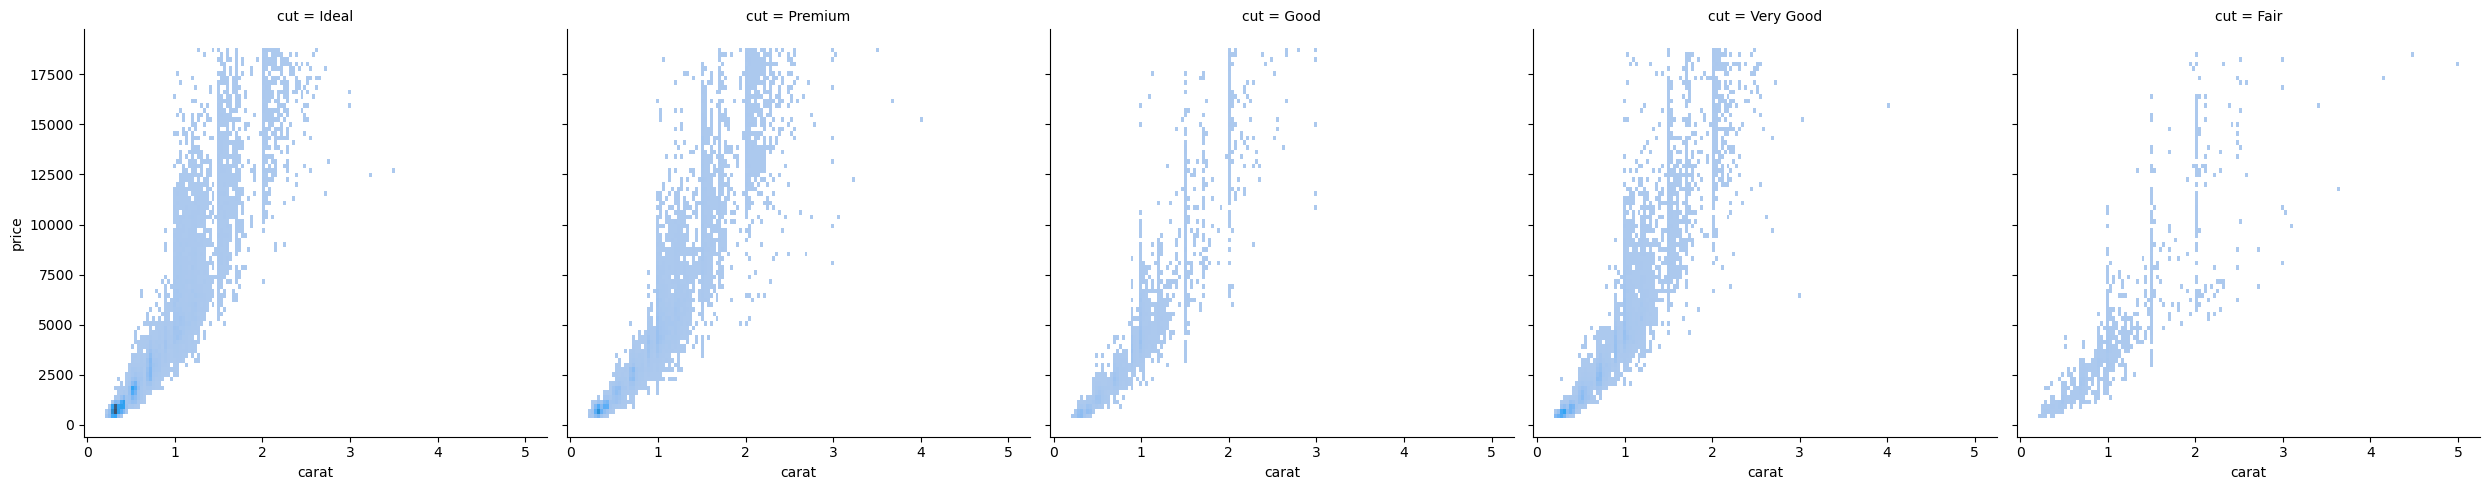

In [6]:
sns.displot(data=diamonds, x='carat',y='price',col='cut')

### Zadanie

Narysowac wykres ceny od wielkosci w skali logarytmicznej


c:\Users\krzys\miniconda3\envs\anomalie\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\krzys\miniconda3\envs\anomalie\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\krzys\miniconda3\envs\anomalie\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\krzys\miniconda3\envs\anomalie\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When groupi

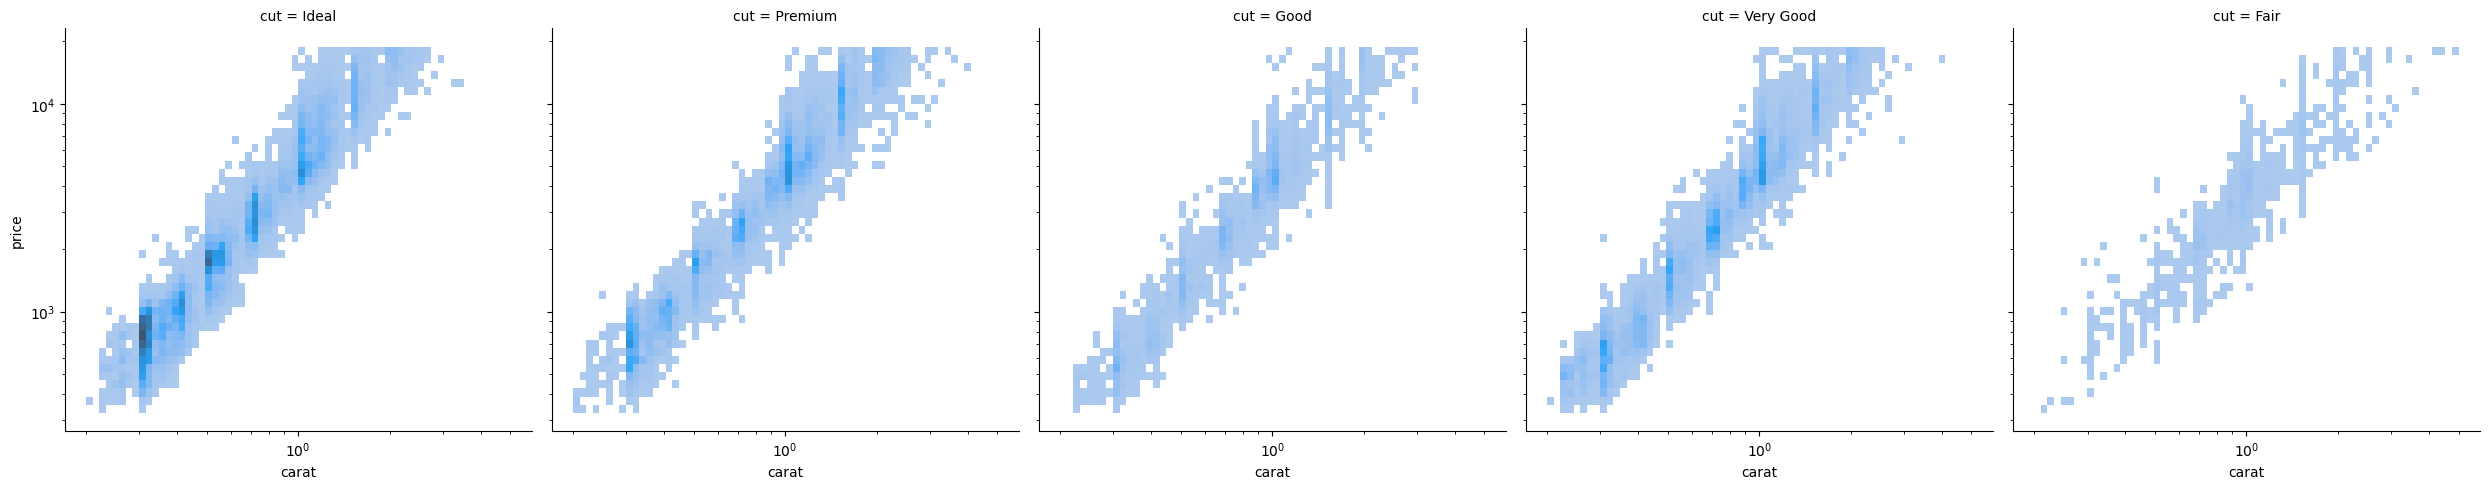

In [8]:
#TODO
sns.displot(data=diamonds, x='carat',y='price',col='cut', log_scale=True)

### Dane

In [9]:
x=diamonds.carat.to_numpy()[...,np.newaxis]
y=diamonds.price.to_numpy()[...,np.newaxis]

yn = (y-np.mean(y))/np.std(y)
xn = (x-np.mean(x))/np.std(x)

xl = jnp.log10(x)
yl = jnp.log10(y)


### Dopasujmy model liniowy:

$price=w*carat +b$

### Mini biblioteka

In [13]:
def init_lm(key,shape):
    return dict(
        w=jax.random.normal(key,shape),
        b=jnp.zeros(shape[-1]),
    )

@jax.jit
def apply_lm(theta:dict,x:jnp.ndarray):
    return x@theta['w'] + theta['b']

@jax.jit
def loss(theta,x,y):
    yhat = apply_lm(theta,x)
    return jnp.mean(jnp.square(y-yhat))

grad_loss = jax.jit(jax.grad(loss))


def fit_lm(x,y,batch_size=128, steps=100, learning_rate=0.01):
    k = jax.random.PRNGKey(42)
    params  = init_lm(k,(x.shape[1],y.shape[1]))
    losses=[]

    def sgd(t, dt):
        return t-learning_rate*dt

    for i in range(steps):
        idx = np.random.randint(0,50000,size=batch_size)
        bx = x[idx,...]
        by = y[idx,...]

        grads = grad_loss(params,bx,by)
        params = jax.tree_util.tree_map(sgd,params,grads)
        losses.append(loss(params,bx,by))
    return params, losses



i test działania

In [14]:

def tmp():
    k = jax.random.PRNGKey(43)
    params = init_lm(k, [1,1])
    x = np.random.normal(size=(8,1))
    print(apply_lm(params,x).shape)
tmp()

(8, 1)


### Model

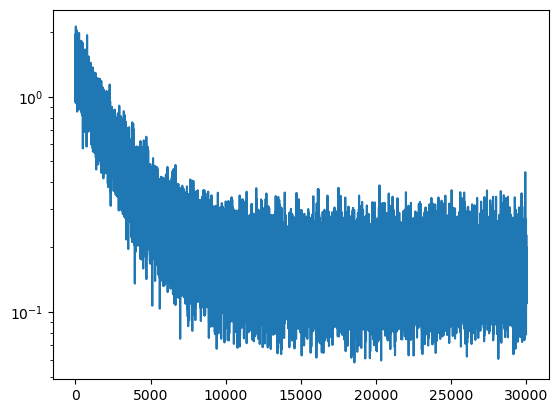

In [18]:
# params, losses = fit_lm(xn, yn,steps=3000, learning_rate=1e-4)
params, losses = fit_lm(xn, yn,steps=30000, learning_rate=1e-4)
plt.plot(losses)
plt.yscale('log')

c:\Users\krzys\miniconda3\envs\anomalie\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\krzys\miniconda3\envs\anomalie\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


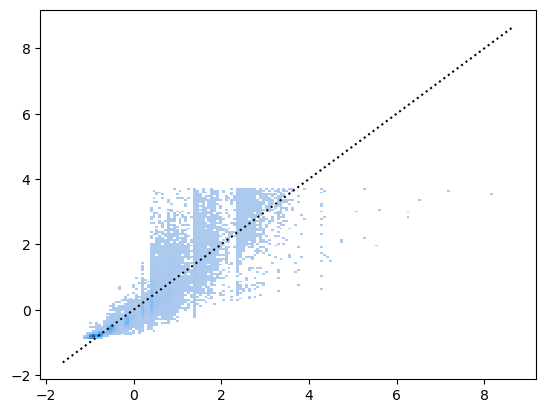

In [19]:
sns.histplot(x=apply_lm(params,xn).flatten(),y=yn.flatten())
plt.plot(plt.xlim(),plt.xlim(), 'k:')

## Zadanie

zbudowac model liniowy na skali logarytmicznej

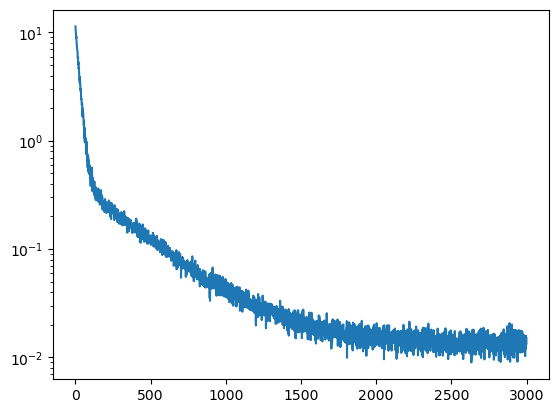

In [22]:
#TODO
params, losses = fit_lm(xl, yl,steps=3000)
plt.plot(losses)
plt.yscale('log')

c:\Users\krzys\miniconda3\envs\anomalie\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\krzys\miniconda3\envs\anomalie\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


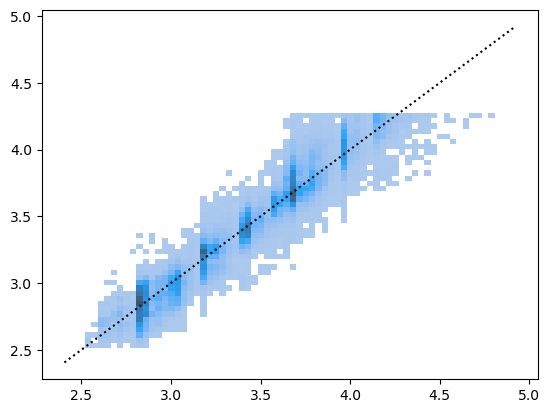

In [23]:
sns.histplot(x=apply_lm(params,xl).flatten(),y=yl.flatten())
plt.plot(plt.xlim(),plt.xlim(), 'k:')

In [24]:
params

{'b': Array([3.6627748], dtype=float32),
 'w': Array([[1.6363188]], dtype=float32)}

## Zadanie

Sprawdzić learning_rate 0.1 i 0.000001

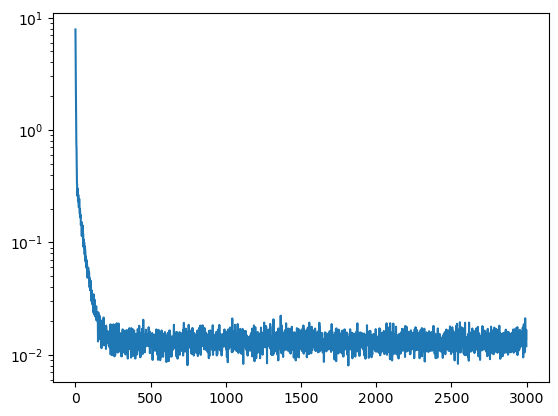

In [32]:
#TODO
params, losses = fit_lm(xl, yl,steps=3000, learning_rate=0.1)
plt.plot(losses)
plt.yscale('log')

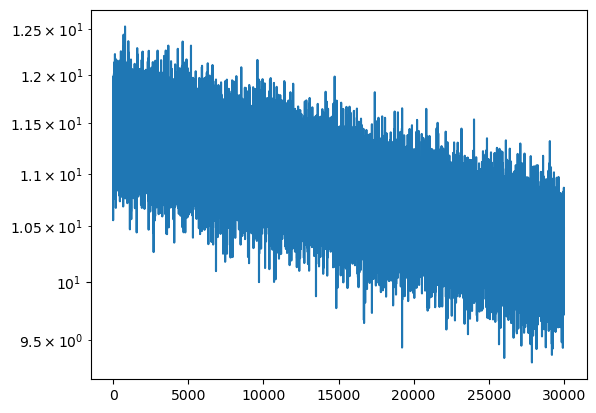

In [27]:
params, losses = fit_lm(xl, yl,steps=30000, learning_rate=1e-6)
plt.plot(losses)
plt.yscale('log')


## Zadanie

Narysować histogram reszt, ile jest obserwacji powyżej 3 odchylenia standardowe?

Array(456, dtype=int32)

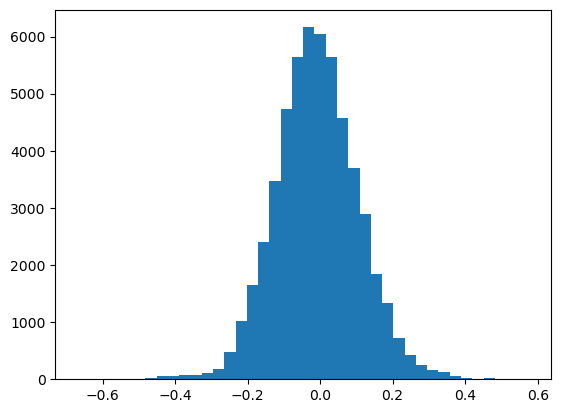

In [33]:
# TODO
resid = (yl-apply_lm(params, xl))[:, 0]
plt.hist(np.asarray(resid), 40)

(np.abs(resid)>3*np.std(resid)).sum()


## Anomalie

Reszty pozwalaja nam wykryć anomlaie

In [34]:
anomalie=np.where(np.abs(resid)>4*np.std(resid))
anomalie[0]

array([ 1362,  2024,  2025,  2366,  2411, 11604, 11634, 12246, 13002,
       13118, 13757, 14138, 15684, 16283, 16404, 16540, 17181, 17196,
       19339, 19346, 19866, 20462, 21758, 21862, 22428, 22540, 23644,
       24328, 25625, 25718, 25924, 25925, 25997, 25998, 25999, 26003,
       26077, 26105, 26198, 26237, 26311, 26407, 26444, 26483, 26491,
       26549, 26634, 26660, 26965, 26998, 27130, 27196, 27226, 27349,
       27415, 27455, 27457, 27507, 27530, 27630, 27635, 36571, 38152,
       41820, 41918, 42673, 44039, 46476, 47949, 50671, 50672, 51173,
       51174, 51369, 52422, 52805], dtype=int64)

## Wiele zmiennych

Regresja liniowa to nie tylko jedna zmienna.

### ZAdanie

Wytrenowac model $log(cena) = w_0+w_1 \log(x) + w_2 \log(y) + w_3 \log(z) $

In [ ]:
#TODO

C:\Users\krzys\AppData\Local\Temp\ipykernel_2044\4017312016.py:1: RuntimeWarning: divide by zero encountered in log10
  xy=np.log10(diamonds[['x','y','z','price']].to_numpy())
c:\Users\krzys\miniconda3\envs\anomalie\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\krzys\miniconda3\envs\anomalie\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


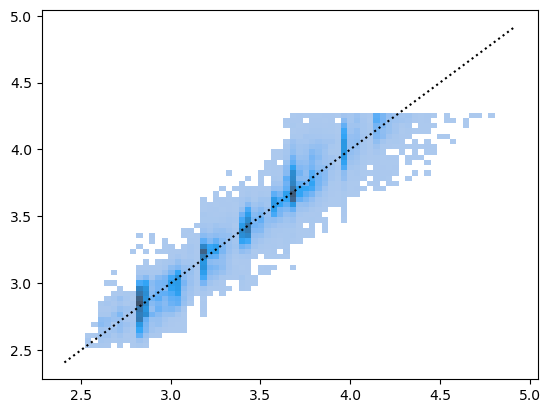

In [36]:

xy=np.log10(diamonds[['x','y','z','price']].to_numpy())
idx = np.all(np.isfinite(xy),axis=1)
x=xy[idx,:3]
y=xy[idx,3:]

params, losses = fit_lm(xl, yl,steps=3000, learning_rate=0.01)
sns.histplot(x=apply_lm(params,xl).flatten(),y=yl.flatten())
plt.plot(plt.xlim(),plt.xlim(), 'k:')

# Klasyfikacja

Diamenty posiadaja cechy, które nei sa liczbami

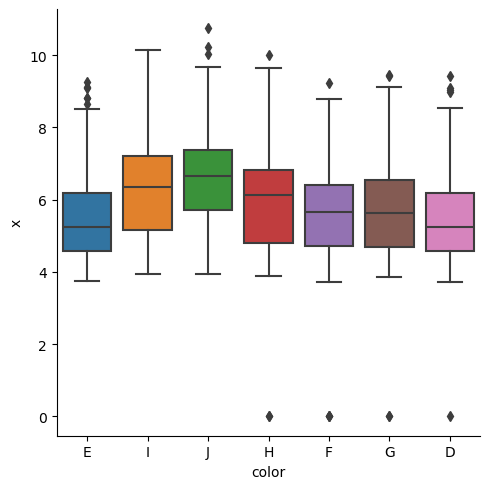

In [37]:
sns.catplot(data=diamonds, y='x',x='color', kind='box')

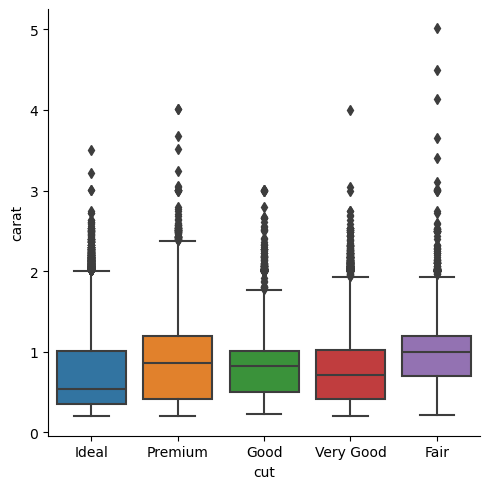

In [38]:
sns.catplot(data=diamonds, y='carat',x='cut', kind='box')

Czy po wymiarach ocenimy kolor lub szlif?

Jak poprzednio zbudujemy model liniowy, ale tym razem chcemy przewidzieć prawdopodobieństwa klasy.

Funkcją kosztu wlaśnie jest to prawdopodobieństwo

ale

- prawdopodobieństwo $\in(0,1)$
- $\sum p_i=1$

Zwykła funkcja liniowa nie wystarczy ale jest trik, modelujemy $\log\frac{p_i}{1-p_i}$ taka funkcja jest znana jako `logit`

$$\log\frac{p_i}{1-p_i}= w_{0i} + w_{1i}x_1 + w_{2i} x_2 + \ldots=l_i$$

$$p_i = \frac{e^l_i}{\sum_je^{l_j}}$$

Y tez ma  teraz inną postać: hot-1 $y=[0,1,0,0]$.

Prawdopodobienstwo dostania takiego wyniku=$p_1=\mathbf l \cdot \mathbf y$


## Minibiblioteka cd.

In [39]:
@jax.jit
def loss(theta,x,y):
    l = apply_lm(theta,x)
    lp = jax.nn.log_softmax(l)

    return -jnp.mean(lp*y)

grad_loss = jax.jit(jax.grad(loss))

def fit_glm(x,y,batch_size=256, steps=100, learning_rate=0.01):
    k = jax.random.PRNGKey(42)
    params  = init_lm(k,(x.shape[1],y.shape[1]))
    losses=[]

    def sgd(t, dt):
        return t-learning_rate*dt

    for i in range(steps):
        idx = np.random.randint(0,50000,size=batch_size)
        bx = x[idx,...]
        by = y[idx,...]

        grads = grad_loss(params,bx,by)
        params = jax.tree_util.tree_map(sgd,params,grads)
        losses.append(loss(params,bx,by))
    return params, losses

@ft.partial(jax.jit, static_argnames=('n'))
def cm(labels, predictions, n):

    def f(carry, pair):
        y,haty = pair
        return carry.at[y,haty].add(1), None

    init = jnp.zeros((n,n), dtype=jnp.uint32)
    confusion_matrix, _ = jax.lax.scan(f, init, (labels, predictions))
    return confusion_matrix

In [40]:
y = pd.get_dummies(diamonds.color).to_numpy()
x = diamonds[['x','y','z']].to_numpy()

x=(x-np.mean(x,0))/np.std(x,0)

{'b': Array([-0.24754924,  0.10700846,  0.1526164 ,  0.27473086,  0.06953993,
       -0.11629962, -0.24004625], dtype=float32), 'w': Array([[-1.0935136 ,  0.67046535,  0.17731407,  0.40712002, -0.39046666,
         1.2862688 ,  0.49102587],
       [ 0.3324239 ,  1.4917625 , -0.256014  ,  0.661072  ,  0.85102767,
        -1.1574376 ,  0.36146197],
       [ 0.73058593, -1.5738473 ,  0.71217835, -0.48753998,  0.53226835,
         0.8768833 , -0.06024884]], dtype=float32)}


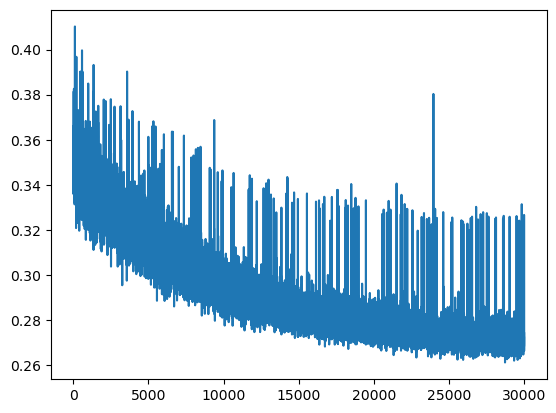

In [44]:
params, losses = fit_glm(x, y,steps=30000,learning_rate=0.001)
plt.plot(losses)
print(params)

Dokładność klasyfikacji

In [45]:
c = apply_lm(params,x)
c = jnp.argmax(c,1)

np.mean(c==jnp.argmax(y,1)), 1/7

(Array(0.18531702, dtype=float32), 0.14285714285714285)

20% nie wygląda dobrze, ale trzeba pamiętać że mamy 7 klas i wybierając losowo dostaniemy 14%

Array([[2283,  508,  292, 2417, 1110,  165,    0],
       [3329,  758,  389, 3428, 1633,  260,    0],
       [2624,  776,  389, 3176, 2204,  373,    0],
       [3248,  705,  409, 3333, 3050,  547,    0],
       [2071,  550,  293, 1930, 2725,  735,    0],
       [1105,  321,  220, 1197, 2071,  508,    0],
       [ 381,  177,  108,  541, 1282,  319,    0]], dtype=uint32)

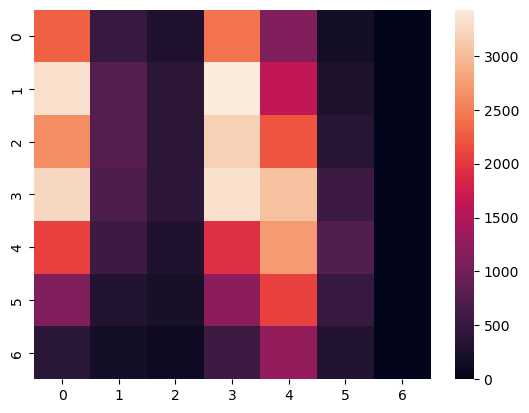

In [46]:
sns.heatmap(cm(jnp.argmax(y,1),c,7), label=True);
cm(jnp.argmax(y,1),c,7)

### Zadanie

zbudowac kalsyfikator dla szlifu

(Array(0.42632556, dtype=float32), 0.14285714285714285)

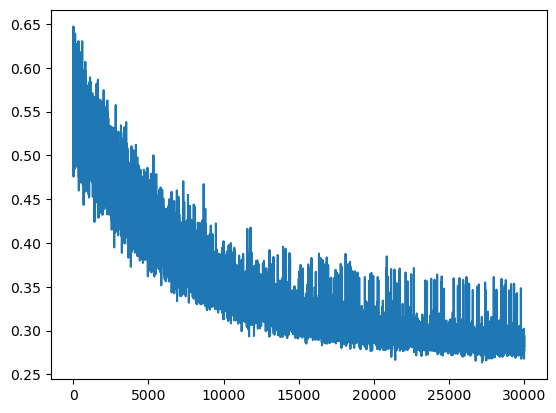

In [47]:
#TODO
y = pd.get_dummies(diamonds.cut).to_numpy()
x = diamonds[['x','y','z']].to_numpy()

x=(x-np.mean(x,0))/np.std(x,0)

params, losses = fit_glm(x, y,steps=30000,learning_rate=0.001)
plt.plot(losses)

c = apply_lm(params,x)
c = jnp.argmax(c,1)

np.mean(c==jnp.argmax(y,1)), 1/7

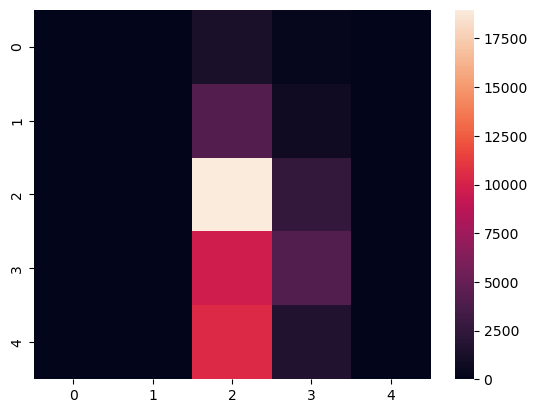

In [48]:
sns.heatmap(cm(jnp.argmax(y,1),c,5), label=True);